In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

import pandas as pd

with open('/content/drive/MyDrive/reaction_prediction/concatenated_pos_neg.csv') as f:
  data = pd.read_csv(f, index_col = 0)

Mounted at /content/drive/


In [ ]:
data.shape

(63494, 2)

In [ ]:
with open('/content/drive/MyDrive/reaction_prediction/stopwords.txt') as f:
  stopwords = pd.read_table(f, header = None)

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [ ]:
def plot_wordcloud(text, plot_name = '', mode = 'text'):
  wordcloud = WordCloud(width=1600, height=1000, random_state=21, 
                        background_color="white", max_font_size=110,
                        relative_scaling = 0.5)
  if mode == 'text':
    wordcloud = wordcloud.generate(text)
  elif mode == 'frequences':
    wordcloud = WordCloud(width=1600, height=1000, random_state=21, 
                        background_color="white", max_font_size=110,
                        relative_scaling = 0.4)
    wordcloud = wordcloud.fit_words(text)
  else:
    raise NotImplementedError()

  plt.figure(figsize=(13, 10))
  plt.imshow(wordcloud, interpolation="bilinear")
  plt.axis('off')
  plt.savefig(f"{plot_name + ('_' if plot_name != '' else '')}wordcloud.png")
  plt.show()
  # return wordcloud

# 1. Not lemmatized

First we are removing stopwords

In [ ]:
stopwords = stopwords.squeeze()
data['msg_text'] = data['msg_text'].apply(lambda x: ' '.join([w for w in x.split() if (w not in stopwords.values) and not w.isdigit()]))

## Wordcloud for both positive and negative reactions

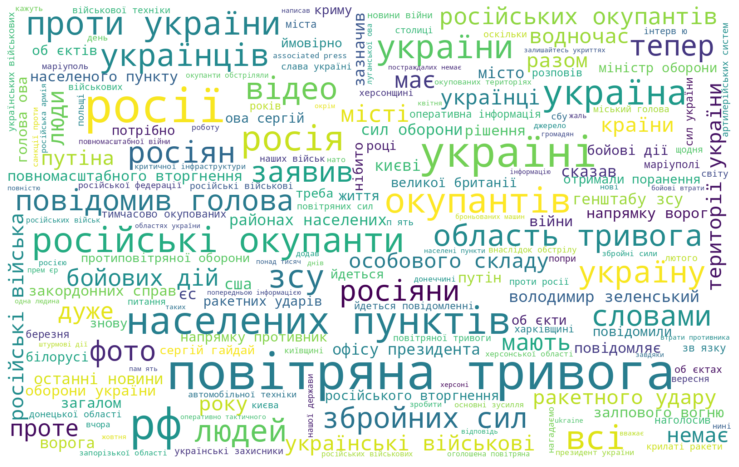

In [ ]:
all_words = ' '.join([text for text in data['msg_text']])

plot_wordcloud(all_words, plot_name='pos_neg')

## Wordcloud for positive reactions

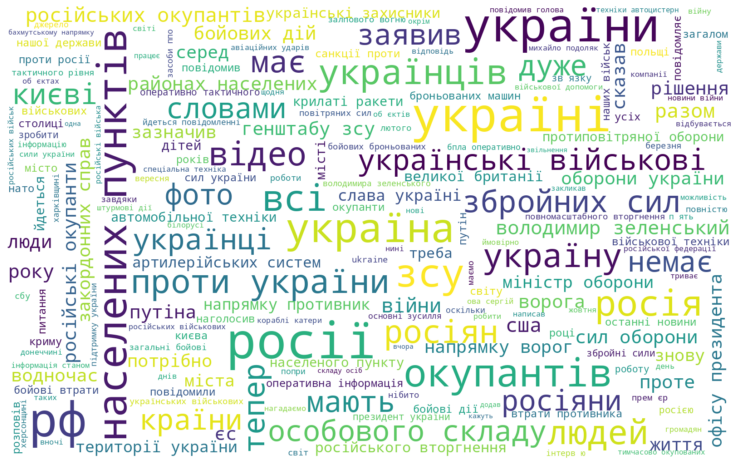

In [ ]:
data_pos = data[data.reaction_type == 1]
all_words_pos = ' '.join([text for text in data_pos['msg_text']])

plot_wordcloud(all_words_pos, 'pos')

## Wordcloud for negative reactions

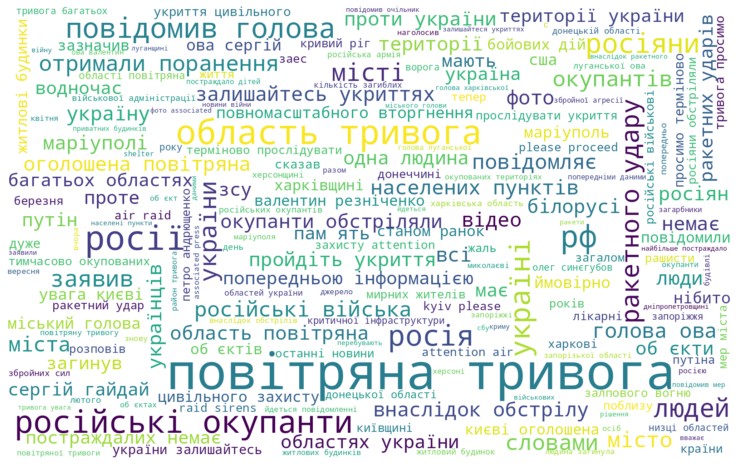

In [ ]:
data_neg = data[data.reaction_type == 0]
all_words_neg = ' '.join([text for text in data_neg['msg_text']])

plot_wordcloud(all_words_neg, 'neg')

# 2. Lemmatized

In [ ]:
def make_frequences(words, word_to_lemma):
  frequences = {}
  for word in words:
      if word in word_to_lemma:
          frequences[word_to_lemma[word]] = frequences.get(word_to_lemma[word], 0) + 1

  frequences['Україна'] += frequences.pop('україна')
  return frequences

In [ ]:
with open('/content/drive/MyDrive/reaction_prediction/word2lem.csv') as f:
  word_to_lemma = pd.read_csv(f, index_col = 0,header=0)

word_to_lemma = word_to_lemma.to_dict(orient='dict')
word_to_lemma = word_to_lemma['0']

In [ ]:
def remove_sm(text):
    
    new_text = text.replace('“', '')
    new_text = new_text.replace('”', '')
    new_text = new_text.replace('…', '')
    return new_text

list_all_words = [remove_sm(word) for msg in data.msg_text for word in msg.split()]
list_pos_words = [remove_sm(word) for msg in data_pos.msg_text for word in msg.split()]
list_neg_words = [remove_sm(word) for msg in data_neg.msg_text for word in msg.split()]

## Wordcloud for both positive and negative reactions

In [ ]:
all_frequences = make_frequences(list_all_words, word_to_lemma)

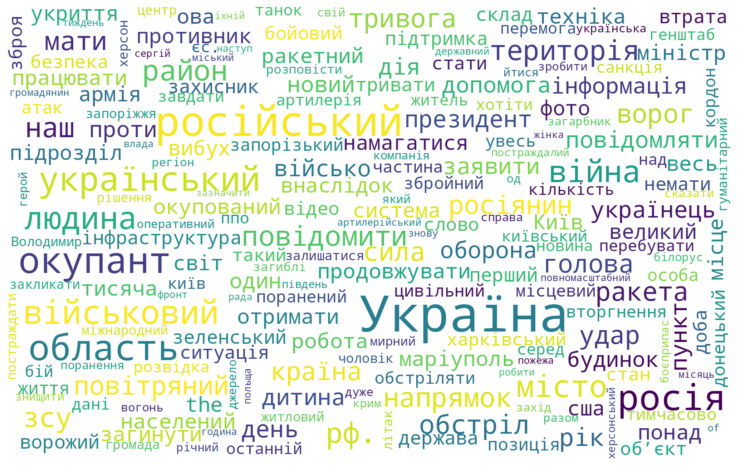

In [ ]:
plot_wordcloud(all_frequences, plot_name='lemm_pos_neg', mode = 'frequences')

## Wordcloud for positive reactions

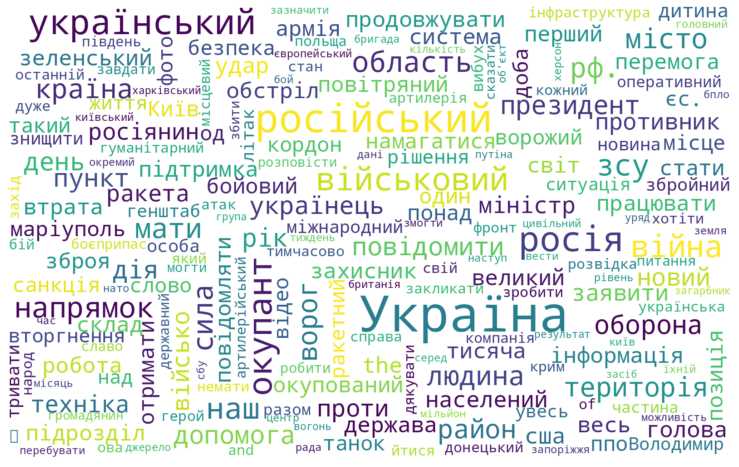

In [ ]:
pos_frequences = make_frequences(list_pos_words, word_to_lemma)
plot_wordcloud(pos_frequences, 'lemm_pos', mode = 'frequences')

## Wordcloud for negative reactions

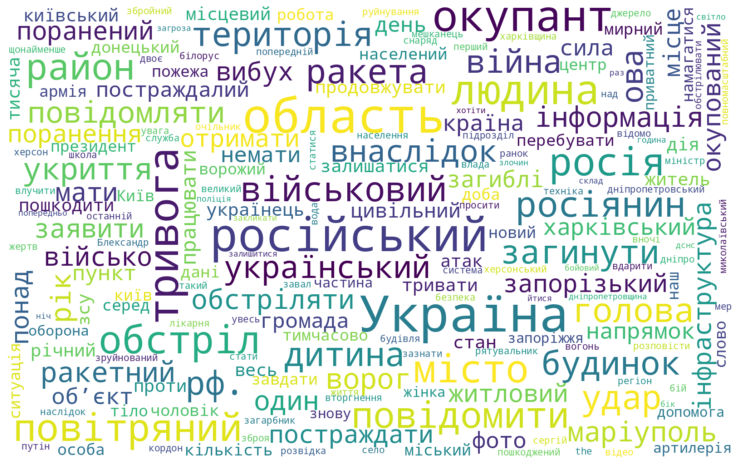

In [ ]:
neg_frequences = make_frequences(list_neg_words, word_to_lemma)
plot_wordcloud(neg_frequences, 'lemm_neg', mode = 'frequences')